# Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
N_SIZE = 250
DOT_SIZE = 4

L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

np.random.seed(N_SEED)
plt.style.use("ggplot")

# plt.style.available

## Self-created dataset

**y = fx(w,b) = wx + b**

In [3]:
random_numbers = np.random.randn(N_SIZE) * 25

X = np.arange(N_SIZE) * 0.5
X = np.reshape(X, (-1, 1)) + 1

y = np.dot(X, np.array([2])) + 10 + random_numbers

## EDA

In [4]:
def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    plt.axis([0, None, 0, None])
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

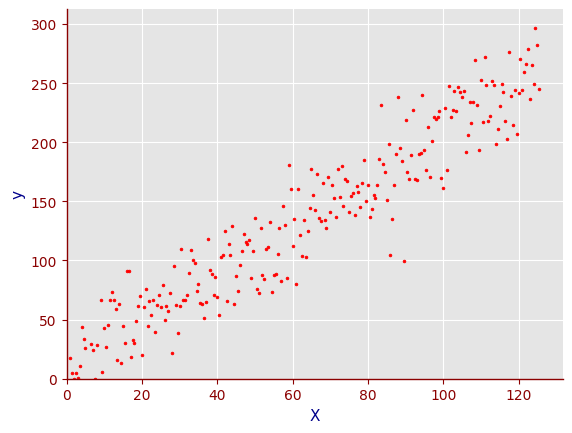

In [5]:
plot_Xy(X, y,)

## Data preprocessing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=N_SEED)

### Train split

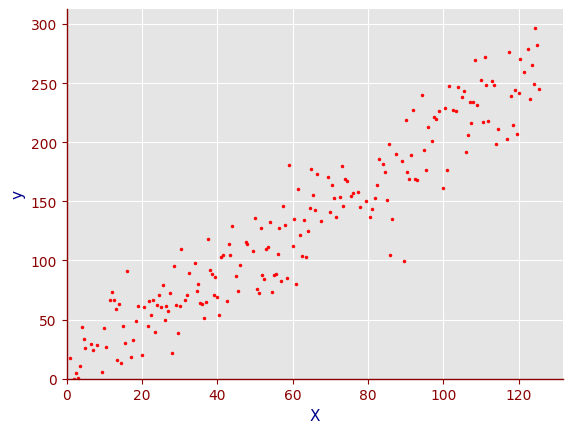

In [7]:
plot_Xy(X_train, y_train)

### Test split

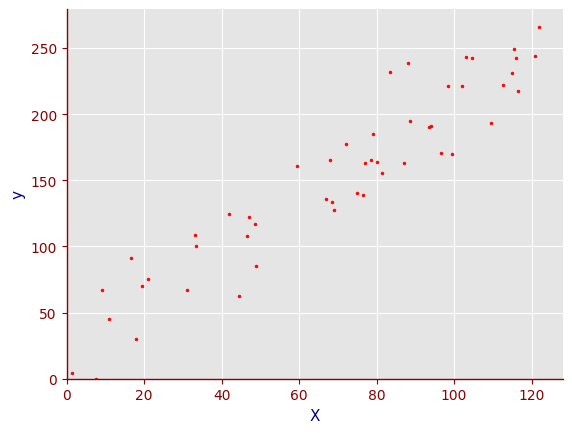

In [8]:
plot_Xy(X_test, y_test)

### Create Linear Regression model and fit

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [9]:
model_LNR = LinearRegression(
    n_jobs=N_JOBS
).fit(X_train, y_train)

In [10]:
model_LNR.score(X_test, y_test)

0.872371570487198

In [11]:
# Coefficient
model_LNR.coef_

array([1.99886354])

In [12]:
# Intercept
model_LNR.intercept_

np.float64(7.07831837494291)

### Predict

In [13]:
y_pred = model_LNR.predict(X_test)

In [14]:
y_pred[:TOP_K]

array([150.99649336, 231.95046679, 199.96865012,  29.06581733,
       141.00217565])

In [15]:
y_test[:TOP_K]

array([177.72404726, 222.1299503 , 170.32876648,  45.06964365,
       135.64385359])

### Mean Square Error

In [16]:
metrics.root_mean_squared_error(y_test, y_pred)

np.float64(24.210227750384977)

### Mean Absolute Error

In [17]:
metrics.mean_absolute_error(y_test, y_pred)

np.float64(19.907754644007387)

### Plot Predicted Function

In [18]:
X_line = [X.min(), X.max()]
y_line = [model_LNR.predict([[X.min()]])[0], model_LNR.predict([[X.max()]])[0]]

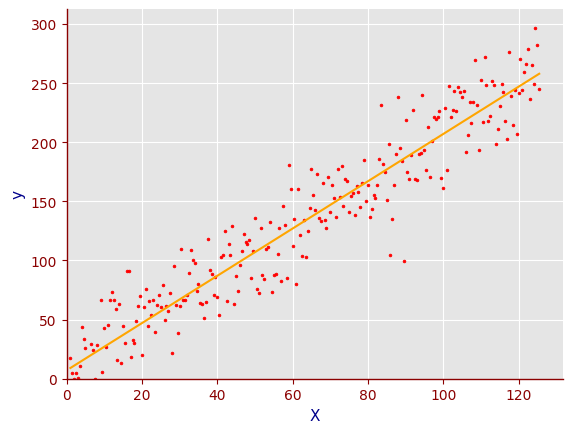

In [19]:
plot_Xy(
    X,
    y,
    X_line,
    y_line,
)